# Classification Model

## importing libraries

In [2]:
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf

## importing dataset

In [3]:
# import the dataset
df = pd.read_csv('../data/csv/2007to2009.csv')

In [4]:
# with open("../data/pkl/2010to2017.pkl", 'rb') as f:
#     data = pickle.load(f)

In [5]:
%run ../script/cleanup.py

In [6]:
data = cleanup(df, onehot=False)

## selecting the right features

In [6]:
dataset=data[['maxTemp','Eto_values','rain','DaySolRad','stage']]

## Working with Sklearn

In [7]:
from sklearn.model_selection import train_test_split
# dataset
labels = dataset.pop('stage')
feat_data = dataset


In [8]:
X_train, X_test, y_train, y_test = train_test_split(feat_data, labels, test_size = 0.3, random_state = 101)

In [9]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

## constracting the model using Keras in tensorflow¶

In [10]:
# from tensorflow.contrib.keras import models
# # add layers to the model
# from tensorflow.contrib.keras import layers

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
#creating models
# dnn_keras_model = models.Sequential()

In [13]:
# dnn_keras_model.add(layers.Dense(units = 13, activation='relu'))
# dnn_keras_model.add(layers.Dense(units= 13, activation = 'relu'))
# # last layer have to have an out units of 3 because we are predicting three class
# dnn_keras_model.add(layers.Dense(units=4, activation='softmax'))

In [14]:
def build_model():
    model = keras.Sequential([
        layers.Dense(units=64, activation=tf.nn.relu, input_shape = [4]), # [len(scaled_x_train.keys())]),
        layers.Dense(units=128, activation=tf.nn.relu),
#         layers.Dense(units=256, activation=tf.nn.relu),
#         layers.Dense(units=128, activation=tf.nn.relu),
        layers.Dense(units=64, activation=tf.nn.relu),
        layers.Dense(units=4, activation=tf.nn.softmax)
    ])
    optimizer = tf.keras.optimizers.Adam(lr=0.01)
    model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer= optimizer,
#                   metrics=['mse'])
#                  metrics=['accuracy'])
                  metrics= ['sparse_categorical_crossentropy'])
    return model

In [15]:
model = build_model()

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 17,156
Trainable params: 17,156
Non-trainable params: 0
_________________________________________________________________


In [17]:
# compile the model
# from tensorflow.keras import losses, optimizers, metrics, activations

In [18]:
# dnn_keras_model.compile(optimizer='adam',
#                        loss = 'sparse_categorical_crossentropy',
#                        metrics=['accuracy'])

In [19]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [20]:
# dnn_keras_model.fit(scaled_x_train, y_train, epochs=50)
EPOCHS = 10000
history = model.fit(scaled_x_train, y_train,
    epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [21]:
hist = pd.DataFrame(history.history)

In [22]:
hist['epoch'] = history.epoch

In [23]:
head = hist.tail()

In [24]:
head

,val_loss,val_sparse_categorical_crossentropy,loss,sparse_categorical_crossentropy,epoch
9995,1.849764,1.849764,0.294200,0.294200,9995
9996,1.487353,1.487353,0.237633,0.237633,9996
9997,1.525304,1.525304,0.228378,0.228378,9997
9998,1.576879,1.576879,0.213502,0.213502,9998
9999,1.532590,1.532590,0.199946,0.199946,9999


## Writing plot function

In [25]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Classification Error')
    plt.plot(hist['epoch'], hist['sparse_categorical_crossentropy'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_sparse_categorical_crossentropy'],
            label='Val Error')
    plt.legend()
    plt.savefig('../image/modelerror.png')
    plt.ylim([0,5])
    
#     plt.figure()
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [Harverst^2]')
#     plt.plot(hist['epoch'], hist['mean_squared_error'],
#             label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mean_squared_error'],
#             label='Val Error')
#     plt.legend()
#     plt.ylim([0,0.0625])

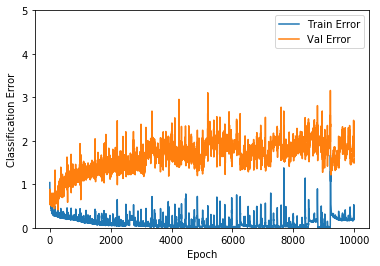

In [26]:
plot_history(history)


In [27]:
scores = model.evaluate(scaled_x_test, y_test)
print("Accuracy: %.2f%%"%(scores[1]*100))


137/137 [==============================] - 0s 73us/step
Accuracy: 70.29%



...........................

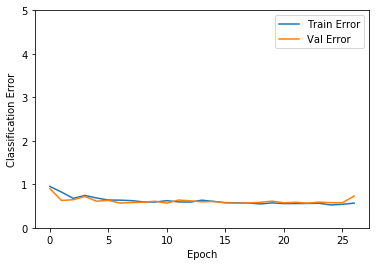

In [29]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(scaled_x_train,y_train, epochs=EPOCHS, validation_split= 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
plot_history(history)

In [31]:
scores = model.evaluate(scaled_x_test, y_test)
print("Accuracy: %.2f%%"%(scores[1]*100))

137/137 [==============================] - 0s 66us/step
Accuracy: 70.29%


In [28]:
model.predict( )

In [77]:
def get_prediction(inp):
    # check the input to 4x1 array
    value = (np.array(inp)[:,np.newaxis]).flatten()
    print(value.shape)
    #(inp)[np.newaxis,:]
    # call model dot predict
    p = model.predict(value)
    # get the max value out of the prediction
    return np.argmax(p)
    # return the largest value
    

In [78]:
inp = [0.4204793 , 0.57692308, 1.        , 0.55583756]

In [79]:
get_prediction(inp)

(4,)


ValueError: Error when checking input: expected dense_input to have shape (4,) but got array with shape (1,)

In [ ]:
def get_next_keras(inp):
    idxs = [char_indices[c] for c in inp]
    arrs = np.array(idxs)[np.newaxis,:]
    p = model.predict(arrs)[0]
    return chars[np.argmax(p)]

In [50]:
np.array(inp)[:,np.newaxis]

array([[0.4204793 ],
       [0.57692308],
       [1.        ],
       [0.55583756]])

In [80]:
value = (np.array(inp)[:,np.newaxis]).flatten()

In [81]:
value.shape

(4,)

In [82]:
value

array([0.4204793 , 0.57692308, 1.        , 0.55583756])